## Прогностичний аналіз витрат ферми
**Ціль:** передбачити загальні витрати ферми на майбутні роки.

**Методи прогнозу:**
- Лінійна регресія (scikit-learn)
- Нейронна мережа (PyTorch)
- Часовий ряд (Prophet)

## 1. Завантаження та перегляд даних

In [24]:
import pandas as pd

df = pd.read_csv('farm1_data.csv')

display(df)

,farm_id,year,total_salary,total_equipment_maintenance,total_fertilizer_cost,total_expenses
0,1,2010,10116.22,48987.82,0.00,59104.04
1,1,2011,11200.00,48987.82,0.00,60187.82
2,1,2012,12000.00,48987.82,0.00,60987.82
3,1,2013,46042.85,48987.82,0.00,95030.67
4,1,2014,28041.33,48987.82,0.00,77029.15
5,1,2015,11433.67,48987.82,0.00,60421.49
6,1,2016,13000.00,48987.82,0.00,61987.82
7,1,2017,48274.31,48987.82,0.00,97262.13
8,1,2018,25082.22,48987.82,0.00,74070.04
9,1,2019,31000.00,48987.82,0.00,79987.82


## 2. Підготовка даних для моделей

In [25]:
import numpy as np

X = df[["year"]].values
y = df["total_expenses"].values

## 3. Прогноз за допомогою лінійної регресії (scikit-learn)


Прогноз лінійної регресії на 2025-2027 роки:
Year 2025: 123723.14 грн
Year 2026: 128355.31 грн
Year 2027: 132987.49 грн


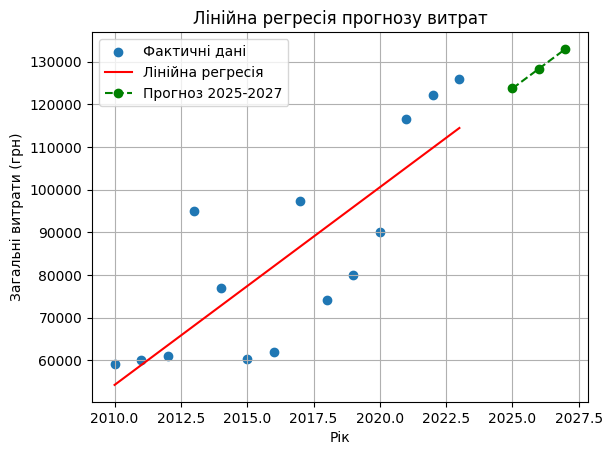

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lr_model = LinearRegression()
lr_model.fit(X, y)

future_years = np.array([[2025], [2026], [2027]])
lr_predictions = lr_model.predict(future_years)

print("\nПрогноз лінійної регресії на 2025-2027 роки:")
for year, pred in zip(future_years.flatten(), lr_predictions):
    print(f"Year {year}: {round(pred, 2)} грн")

plt.scatter(X, y, label="Фактичні дані")
plt.plot(X, lr_model.predict(X), color="red", label="Лінійна регресія")
plt.plot(future_years, lr_predictions, "go--", label="Прогноз 2025-2027")
plt.xlabel("Рік")
plt.ylabel("Загальні витрати (грн)")
plt.title("Лінійна регресія прогнозу витрат")
plt.legend()
plt.grid()
plt.show()

## 4. Прогноз за допомогою поліному (2 степінь)


Поліноміальна регресія (ступінь 2) - прогноз на 2025-2027 роки:
Year 2025: 149341.12 грн
Year 2026: 162207.63 грн
Year 2027: 175989.08 грн


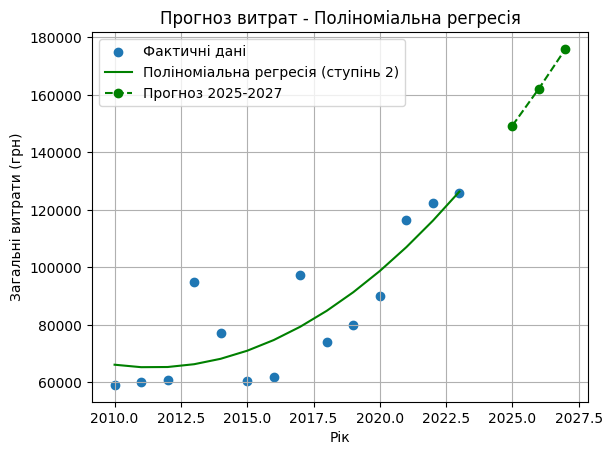


Поліноміальна регресія - MAE на навчальних даних: 10136.16
Поліноміальна регресія - RMSE на навчальних даних: 12064.23


In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_pred = poly_model.predict(X_poly)

future_years = np.array([[2025], [2026], [2027]])
future_years_poly = poly.transform(future_years)
future_predictions = poly_model.predict(future_years_poly)

print("\nПоліноміальна регресія (ступінь 2) - прогноз на 2025-2027 роки:")
for year, pred in zip(future_years.flatten(), future_predictions):
    print(f"Year {year}: {round(pred, 2)} грн")

plt.scatter(X, y, label="Фактичні дані")
plt.plot(X, y_pred, color="green", label="Поліноміальна регресія (ступінь 2)")
plt.plot(future_years, future_predictions, "go--", label="Прогноз 2025-2027")
plt.xlabel("Рік")
plt.ylabel("Загальні витрати (грн)")
plt.title("Прогноз витрат - Поліноміальна регресія")
plt.legend()
plt.grid()
plt.show()

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"\nПоліноміальна регресія - MAE на навчальних даних: {round(mae, 2)}")
print(f"Поліноміальна регресія - RMSE на навчальних даних: {round(rmse, 2)}")


## 5. Прогноз за допомогою Prophet

In [18]:
!pip3 install prophet

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


10:54:10 - cmdstanpy - INFO - Chain [1] start processing
10:54:10 - cmdstanpy - INFO - Chain [1] done processing
/Users/denys.koval/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


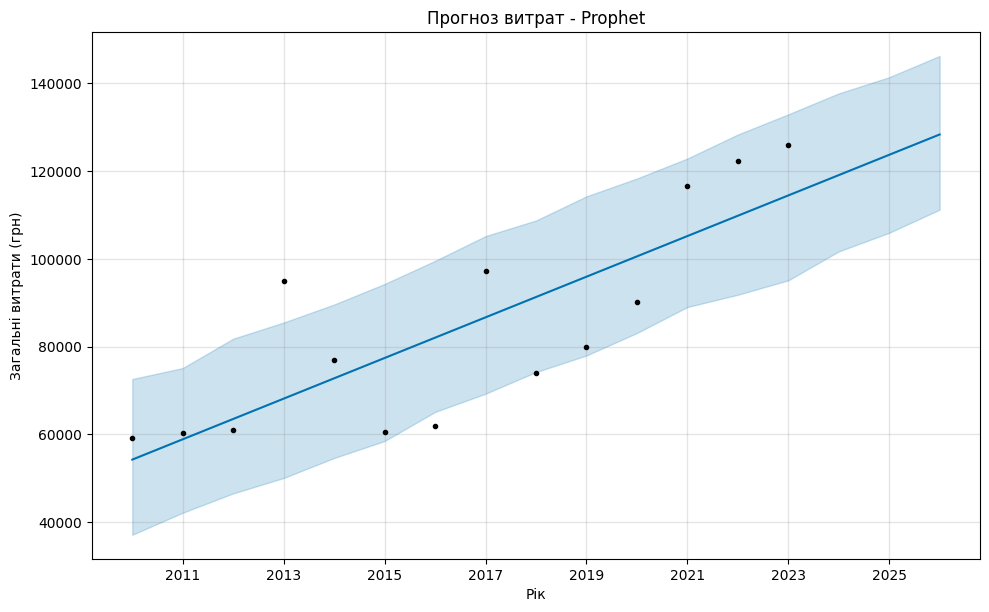


Прогноз Prophet на 2025-2027 роки:


,ds,yhat
14,2023-12-31,119038.076051
15,2024-12-31,123677.967082
16,2025-12-31,128305.180815


In [19]:
from prophet import Prophet

df_prophet = df[["year", "total_expenses"]].rename(
    columns={"year": "ds", "total_expenses": "y"}
)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")

prophet_model = Prophet(yearly_seasonality=False, daily_seasonality=False)
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=3, freq="Y")
forecast = prophet_model.predict(future)

fig = prophet_model.plot(forecast)
plt.title("Прогноз витрат - Prophet")
plt.xlabel("Рік")
plt.ylabel("Загальні витрати (грн)")
plt.show()

print("\nПрогноз Prophet на 2025-2027 роки:")
display(forecast[["ds", "yhat"]].tail(3))


# Висновки

## Лінійна регресія
- **Плюси:** Дуже проста і швидка модель. Добре працює на невеликих наборах даних, показує загальний тренд витрат.
- **Мінуси:** Не може вловлювати нелінійні залежності або різкі зміни в даних.
- **Швидкодія:** Висока (навчання і прогноз займають долі секунди).
- **Точність:** Середня — модель не враховує можливі зміни темпу росту витрат у майбутньому.

## Поліноміальна регресія (ступінь 2)
- **Плюси:** Дозволяє врахувати нелінійні тренди витрат, краще описує зміну витрат у часі.
- **Мінуси:** При занадто високому ступені може переобучатись, потребує уважного налаштування.
- **Швидкодія:** Висока (навчання і прогноз також швидкі).
- **Точність:** Вища за лінійну регресію — краще моделює реальні зміни витрат за роками.

## Prophet
- **Плюси:** Спеціалізована модель для часових рядів. Легко моделює тренд і можливу сезонність, може передбачати майбутнє навіть з невеликим набором історичних даних.
- **Мінуси:** На дуже малих вибірках тренд може бути надто "пригладженим", також потрібно час на навчання (~кілька секунд).
- **Швидкодія:** Середня (потрібно більше часу на навчання, ніж для регресій).
- **Точність:** Висока — добре моделює плавний тренд витрат на основі історичних даних.

# Фінальне порівняння

| Модель | Швидкодія | Точність | Основні переваги |
|:---|:---|:---|:---|
| Лінійна регресія | Дуже висока | Середня | Простота, базова модель тренду |
| Поліноміальна регресія | Висока | Висока | Вловлює нелінійні тренди |
| Prophet | Середня | Висока | Найкраще для часових рядів |

# Підсумок

- Найкращий прогноз на основі реалістичності показав **Prophet**.